In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X=df.drop("species", axis=1)

In [4]:
hc_complete=linkage(X, "complete")

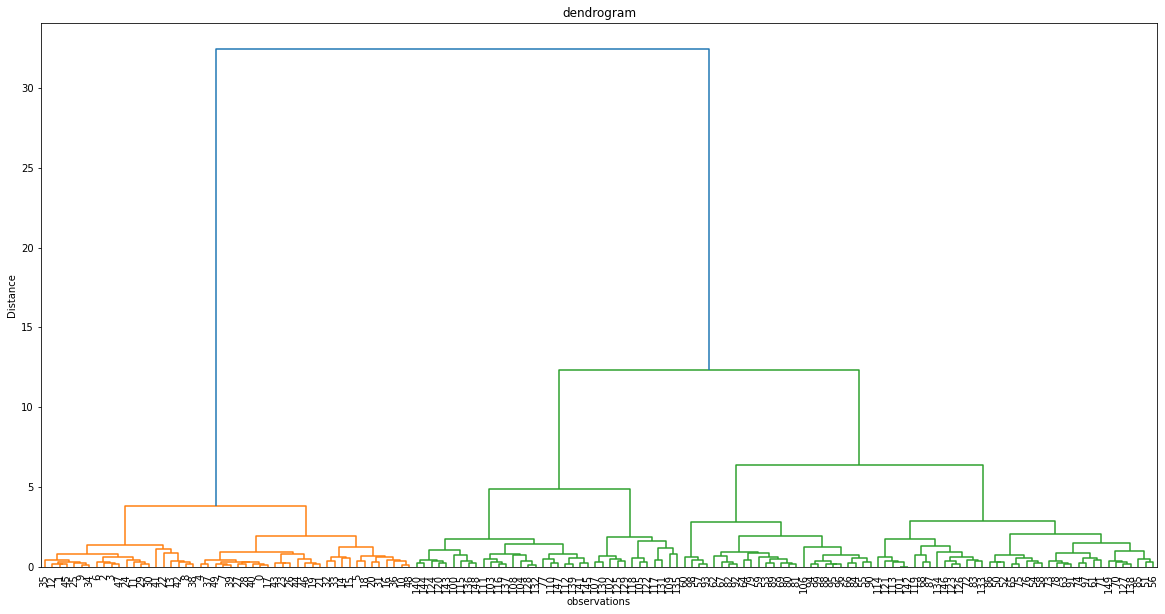

In [7]:
plt.figure(figsize=(20,10))
plt.title("dendrogram")
plt.xlabel("observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
           leaf_font_size=10,)
plt.show()

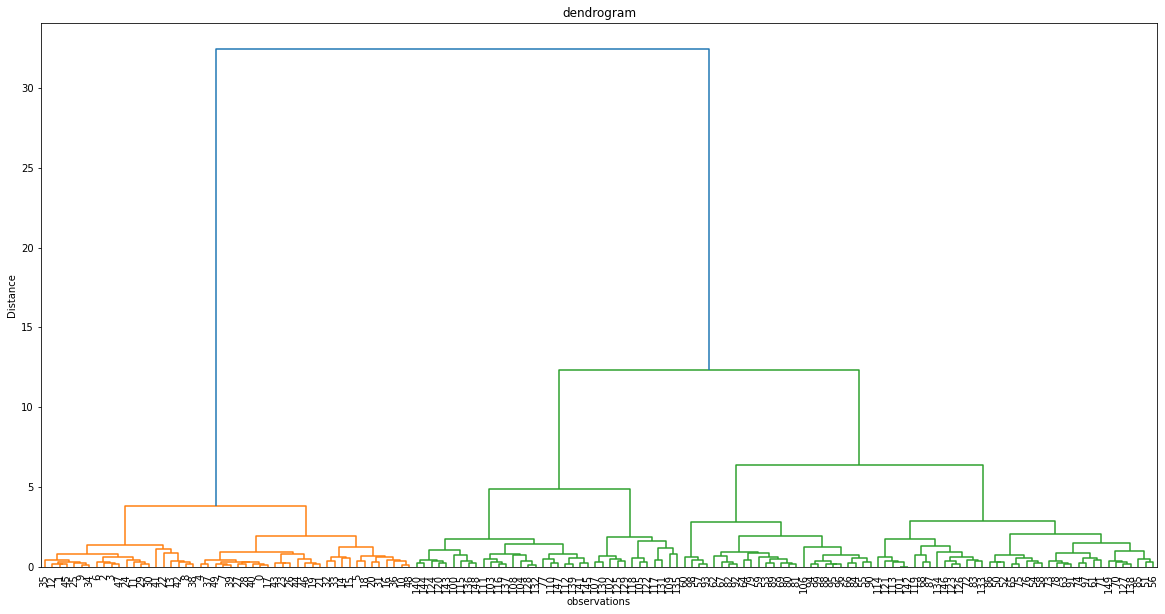

In [10]:
hc_ward=linkage(X, "ward")
plt.figure(figsize=(20,10))
plt.title("dendrogram")
plt.xlabel("observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
           leaf_font_size=10,)
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
model = AgglomerativeClustering(n_clusters=3, linkage="ward")
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [13]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [14]:
df["predicted_clusters"]=model.labels_

In [15]:
pd.crosstab(df["predicted_clusters"], df.species)

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [16]:
map_dict={"virginica":2, "setosa":1, "versicolor":0}

In [17]:
df["original_classes"]=df.species.map(map_dict)

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


In [20]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
8,4.4,2.9,1.4,0.2,setosa,1,1
108,6.7,2.5,5.8,1.8,virginica,2,2
100,6.3,3.3,6.0,2.5,virginica,2,2
20,5.4,3.4,1.7,0.2,setosa,1,1
127,6.1,3.0,4.9,1.8,virginica,0,2


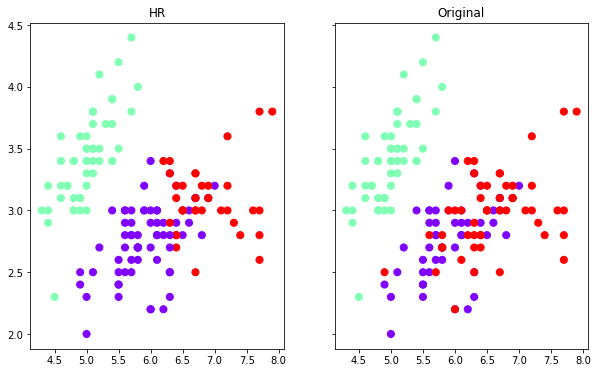

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('HR')
ax1.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 50, cmap = "rainbow")
ax2.set_title("Original")
ax2.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 50, cmap = "rainbow")

In [22]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [25]:
print(f'Silhouette Score(n=3): {silhouette_score(X, model.labels_)}')

Silhouette Score(n=3): 0.5543236611296426


In [26]:
from sklearn.metrics.cluster import adjusted_rand_score

In [27]:
adjusted_rand_score(df["original_classes"], df["predicted_clusters"])

0.7311985567707745